In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix

import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

# setting parameters for dataframe

pd.set_option("display.max_columns" , 1000) 
pd.set_option("display.max_rows" , 1000)  


## setting parameters for plotting
plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["font.size"] = 14

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

    
# tree_graph_to_png(tree=clf_tree, feature_names=['x1', 'x2'], 
#                   png_file_to_save='../../img/topic3_decision_tree1.png')

In [4]:
train = pd.read_csv(r"../Data/PreparedData/train.csv")
test = pd.read_csv(r"../Data/PreparedData/test.csv")

In [5]:
train_c = train.columns.delete(0)

In [23]:
train_c

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Gender'], dtype='object')

In [30]:
submit_copy = pd.read_csv(r"../Data/gender_submission.csv")

In [25]:
train.shape

(891, 8)

In [16]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Gender'],
      dtype='object')

In [6]:
X = train.drop(["Survived"] , axis = 1)
y = train["Survived"]

In [26]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
x_train, x_test , y_train, y_test = train_test_split(X, y , random_state = 42, test_size = 0.3 )

In [27]:
y_train.value_counts()

0    392
1    231
Name: Survived, dtype: int64

## `1. Dtree`

In [42]:
Dtree = DecisionTreeClassifier(criterion = "entropy", random_state = 42)
Dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [43]:
accuracy_score(y_test , Dtree.predict(x_test))

0.753731343283582

In [44]:
f1_score(y_test, Dtree.predict(x_test))

0.676470588235294

In [45]:
precision_score(y_test ,Dtree.predict(x_test) )

0.7419354838709677

In [46]:
recall_score(y_test , Dtree.predict(x_test))

0.6216216216216216

In [51]:
test_prediction = pd.DataFrame({"Survived" :Dtree.predict(test)})


In [52]:
submitfileDtreeBase = pd.concat([submit_copy["PassengerId"] , test_prediction] , axis = 1)

In [54]:
submitfileDtreeBase.to_csv(r"../Data/Prediction/Dtree_base.csv" , index = False)

## `2. Dtree with tuning_v2`

In [55]:
from sklearn.model_selection import GridSearchCV 

tree_params = {'max_depth' : range(4, 20) , 'max_features':range(2, 6) , "min_samples_leaf":range(1, 10)}
Dtree = DecisionTreeClassifier(criterion = "entropy")

grid_tree = GridSearchCV(Dtree , tree_params , cv = 10 , verbose = True , n_jobs = -1)
grid_tree.fit(x_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2832 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:    6.9s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'max_depth': range(4, 20), 'max_features': range(2, 6),
                         'min_samples_leaf': range(1, 10)},
             verbose=True)

In [56]:
grid_tree.best_score_

0.826625704045059

In [57]:
accuracy_score(y_test , grid_tree.predict(x_test))

0.7910447761194029

In [58]:
grid_tree.best_params_

{'max_depth': 13, 'max_features': 3, 'min_samples_leaf': 8}

In [59]:
precision_score(y_test ,grid_tree.predict(x_test) )

0.8235294117647058

In [60]:
recall_score(y_test ,grid_tree.predict(x_test))

0.6306306306306306

In [ ]:
tree_graph_to_png(tree=grid_tree.best_estimator_, feature_names=x_train.columns, 
                  png_file_to_save="../Tree_graph/_basic_decision_tree_grid_search_v2.png")

In [61]:
test_prediction = pd.DataFrame({"Survived" :grid_tree.predict(test)})


In [62]:
submitfileDtreeGrid_v2 = pd.concat([submit_copy["PassengerId"] , test_prediction] , axis = 1)

In [63]:
submitfileDtreeGrid_v2.to_csv(r"../Data/Prediction/Dtree_grid_v2.csv" , index = False)

## `2. Dtree with tuning_v1`

In [69]:
from sklearn.model_selection import GridSearchCV 

tree_params = {'max_depth' : range(4, 20) , 'max_features':range(2, 6) }
Dtree = DecisionTreeClassifier(criterion = "entropy" , random_state=42)

grid_tree_v1 = GridSearchCV(Dtree , tree_params , cv = 10 , verbose = True , n_jobs = -1)
grid_tree_v1.fit(x_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    0.7s finished


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(4, 20),
                         'max_features': range(2, 6)},
             verbose=True)

In [70]:
grid_tree_v1.best_score_

0.8314132104454683

In [71]:
accuracy_score(y_test , grid_tree_v1.predict(x_test))

0.8246268656716418

In [72]:
grid_tree_v1.best_params_

{'max_depth': 4, 'max_features': 4}

In [73]:
precision_score(y_test ,grid_tree_v1.predict(x_test) )

0.8478260869565217

In [74]:
recall_score(y_test ,grid_tree_v1.predict(x_test))

0.7027027027027027

In [75]:
f1_score(y_test ,grid_tree_v1.predict(x_test))

0.7684729064039408

In [76]:
tree_graph_to_png(tree=grid_tree_v1.best_estimator_, feature_names=x_train.columns, 
                  png_file_to_save="../Tree_graph/_basic_decision_tree_grid_search_v1.png")

In [77]:
test_prediction = pd.DataFrame({"Survived" :grid_tree_v1.predict(test)})


In [78]:
submitfileDtreeGrid_v1 = pd.concat([submit_copy["PassengerId"] , test_prediction] , axis = 1)

In [79]:
submitfileDtreeGrid_v1.to_csv(r"../Data/Prediction/Dtree_grid_v1.csv" , index = False)

## `3. Random Forest`

In [36]:
RF_base = RandomForestClassifier(n_estimators=100 , criterion  ="entropy")
RF_base.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy')

In [37]:
accuracy_score(y_test , RF_base.predict(x_test))

0.7947761194029851

In [38]:
f1_score(y_test , RF_base.predict(x_test))

0.7417840375586854

## `RF with tuning`

In [40]:
forest_params = {'max_depth': range(6, 12),
                 'max_features': range(4, 19)}

RF_base = RandomForestClassifier(n_estimators=1000, criterion = "entropy")
RF_grid = GridSearchCV(RF_base , forest_params , cv = 10 , n_jobs = -1 , verbose = True)
RF_grid.fit(x_train, y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  2.5min finished


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=1000),
             n_jobs=-1,
             param_grid={'max_depth': range(6, 12),
                         'max_features': range(4, 19)},
             verbose=True)

In [41]:
RF_grid.best_score_ , RF_grid.best_estimator_

(0.833026113671275,
 RandomForestClassifier(criterion='entropy', max_depth=9, max_features=4,
                        n_estimators=1000))

In [80]:
accuracy_score(y_test , RF_grid.predict(x_test))

0.8097014925373134

In [81]:
f1_score(y_test , RF_grid.predict(x_test))

0.7411167512690354

In [82]:
precision_score(y_test , RF_grid.predict(x_test))

0.8488372093023255

In [83]:
recall_score(y_test , RF_grid.predict(x_test))

0.6576576576576577

In [ ]:
# Train the model on full dataset.

In [18]:
forest_params = {'max_depth': range(6, 12),
                 'max_features': range(4, 19),
                 'min_samples_leaf' : range(1, 50)}

RF_base = RandomForestClassifier(n_estimators=1000, criterion = "entropy")
RF_grid = GridSearchCV(RF_base , forest_params , cv = 10 , n_jobs = -1 , verbose = True)
RF_grid.fit(X, y)

Fitting 10 folds for each of 4410 candidates, totalling 44100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

KeyboardInterrupt: 

In [ ]:
RandomForestClassifier()

In [84]:
test_prediction = pd.DataFrame({"Survived" :RF_grid.predict(test)})

In [85]:
submitfileRFGrid = pd.concat([submit_copy["PassengerId"] , test_prediction] , axis = 1)

In [86]:
submitfileRFGrid.to_csv(r"../Data/Prediction/RF_grid.csv" , index = False)

In [ ]:
# we have finished at 5143. will try hard tomorrow.

In [ ]:
## lets try our linear model

## Logistic Regression


In [11]:
LR = LogisticRegression(random_state= 42 , n_jobs = -1)
LR.fit(x_train, y_train)

LogisticRegression(n_jobs=-1, random_state=42)

In [12]:
accuracy_score(y_test , LR.predict(x_test))

0.8059701492537313

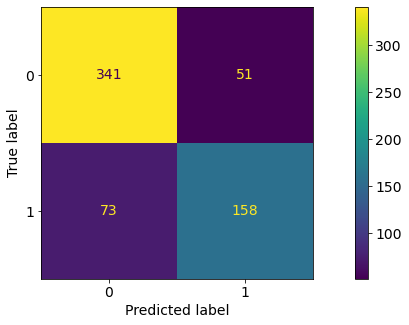

In [13]:
plot_confusion_matrix(LR, x_train , y_train)

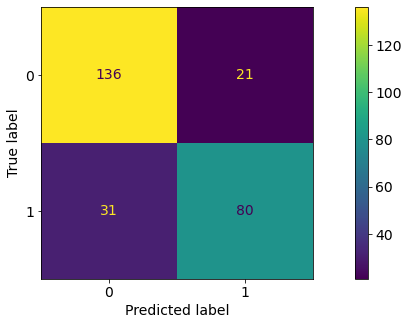

In [14]:
plot_confusion_matrix(LR , x_test , y_test)

In [22]:
col_name  = x_train.columns

In [21]:
len(LR.coef_[0])

7

In [26]:
pd.DataFrame({"Feature Name" : col_name , "Coeffecients": LR.coef_[0]}).sort_values("Coeffecients" , ascending = False)

,Feature Name,Coeffecients
6,Gender,2.457449
5,Embarked,0.310070
4,Fare,0.003034
1,Age,-0.034558
3,Parch,-0.079665
2,SibSp,-0.276756
0,Pclass,-0.940076


In [27]:
LR.fit(X , y)

LogisticRegression(n_jobs=-1, random_state=42)

In [28]:
test_prediction = pd.DataFrame({"Survived" :LR.predict(test)})

In [32]:
submitfileRFGrid = pd.concat([submit_copy["PassengerId"] , test_prediction] , axis = 1)

In [33]:
submitfileRFGrid.to_csv(r"../Data/Prediction/LR_base.csv" , index = False)

In [ ]:
##

In [1]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.model_selection import cross_val_score   #Additional scklearn functions
from sklearn import metrics
from sklearn.model_selection import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

# train = pd.read_csv('train_modified.csv')
# target = 'Disbursed'
# IDcol = 'ID'


In [11]:

def modelfit(alg, dtrain, predictors, target, performCV=True, printFeatureImportance=True, cv_folds=5 ):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

        
        
# #Choose all predictors except target & IDcols
# predictors = [x for x in train.columns if x not in [target, IDcol]]
# gbm0 = GradientBoostingClassifier(random_state=10)
# modelfit(gbm0, train, predictors)


Model Report
Accuracy : 0.8934
AUC Score (Train): 0.946788
CV Score : Mean - 0.8706821 | Std - 0.03901668 | Min - 0.8165775 | Max - 0.9286664


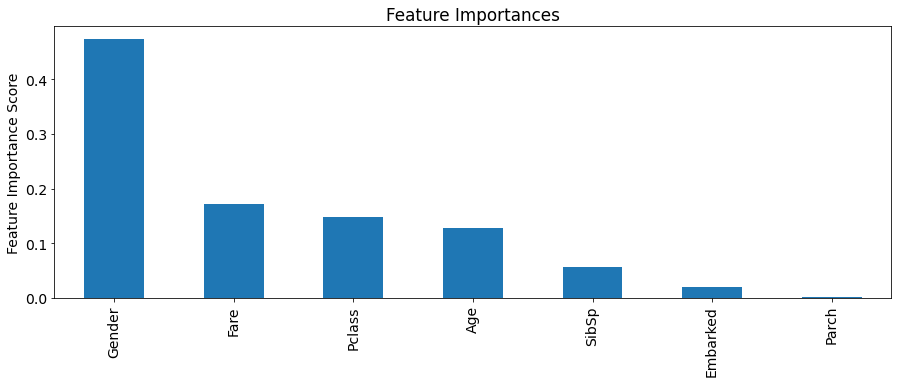

In [12]:
target = "Survived"
predictors = [x for x in train.columns if x not in [target]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train, predictors, target = target)

In [15]:
test_prediction = pd.DataFrame({"Survived" :gbm0.predict(test)})

submitfileRFGrid = pd.concat([submit_copy["PassengerId"] , test_prediction] , axis = 1)

submitfileRFGrid.to_csv(r"../Data/Prediction/GBM_basic.csv" , index = False)